In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [22]:
data = pd.read_csv('/Users/catherinebreen/Documents/Chapter1/WRRsubmission/results_with_actual_snowDepth.csv')
data = data[data['actual_sd'] != 'na']
data = data[data['actual_sd'].notna()]
data.head()

,Unnamed: 0,Camera,filename,x1_pred,y1s_pred,x2_pred,y2_pred,x1_proj,y1_proj,x2_proj,y2_proj,proj_pixel_length,proj_cm_length,snow_depth,actual_sd
56,56,E6A,E6A_WSCT0030.JPG,104.85333,24.469479,108.875040,201.80748,2846.019026,373.596504,2955.179607,3081.167773,2709.770878,296.990888,7.809112,2.0
57,57,E6A,E6A_WSCT0039.JPG,105.69205,25.372555,109.896250,206.73805,2868.784136,387.384542,2982.898156,3156.447050,2771.412849,303.746848,1.053152,0.0
58,58,E6A,E6A_WSCT0049.JPG,106.53821,24.987440,109.987076,206.81056,2891.751360,381.504666,2985.363486,3157.554118,2777.627367,304.427959,0.372041,0.0
59,59,E6A,E6A_WSCT0052.JPG,106.45010,25.104330,109.906990,206.56691,2889.359959,383.289325,2983.189730,3153.834069,2772.133151,303.825793,0.974207,0.0
60,60,E6A,E6A_WSCT0067.JPG,106.31333,25.196524,109.874910,206.79579,2885.647572,384.696924,2982.318944,3157.328604,2774.316454,304.065083,0.734917,1.0


In [23]:
data['sd_diff'] = data['snow_depth'] - pd.to_numeric(data['actual_sd'])

In [24]:
## average error at each camera 
summary = data.groupby(['Camera']).mean()
summary

,Unnamed: 0,x1_pred,y1s_pred,x2_pred,y2_pred,x1_proj,y1_proj,x2_proj,y2_proj,proj_pixel_length,proj_cm_length,snow_depth,sd_diff
Camera,,,,,,,,,,,,,
E6A,80.0,108.487363,16.464967,110.233157,162.939083,2944.656994,251.384757,2992.042814,2487.730631,2237.049664,245.180643,59.619357,0.660173
E6B,107.0,111.545504,32.099585,109.386680,189.033900,3027.663701,490.091883,2969.067004,2886.142564,2398.085408,301.918953,2.881047,-1.518953
E9A,142.0,87.162744,30.682546,91.840379,167.180235,2365.845912,468.456734,2492.810277,2552.483933,2087.931226,254.852885,49.947115,0.300961
E9E,217.5,150.566527,55.230877,146.073294,172.463818,4086.805735,843.257146,3964.846551,2633.152928,1794.273496,246.246095,58.553905,-0.725164
E9F,266.0,62.196280,42.017302,61.836095,188.978240,1688.184725,641.514166,1678.408310,2885.292765,2243.816128,307.402810,-2.602810,-2.148264
W1A,326.0,119.096599,7.015945,116.885827,120.694871,3232.621960,107.118448,3172.615297,1842.752043,1736.744067,261.414717,43.385283,0.434463
W2A,380.5,123.881323,35.667504,122.011590,167.220463,3362.493066,544.566353,3311.743157,2553.098142,2009.222746,278.739472,26.060528,0.498028
W2B,425.5,138.072599,75.508580,137.877268,180.030564,3747.684824,1152.854215,3742.382992,2748.680923,1595.868710,281.990001,22.809999,0.857618
W5A,469.0,118.723812,11.758812,124.103577,126.656578,3222.503483,179.531862,3368.525671,1933.774548,1760.577137,226.515854,78.284146,0.150812


In [25]:
print(min(summary['sd_diff']))
print(max(summary['sd_diff']))

-2.148264112357548
1.4816606593840589


In [26]:
## compare distance from camera 
## the bigger the conversion the further it is from the camera: 
conversion = pd.read_csv('/Users/catherinebreen/Documents/Chapter1/WRRsubmission/snowfree_table.csv')
conversion.head()
## merge them and plot
summary = pd.merge(summary, conversion, left_on = 'Camera', right_on='camera', how='left')


(0.0, 2.5)

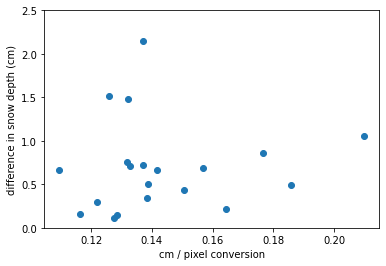

In [44]:
plt.scatter(pd.to_numeric(summary['conversion']), np.absolute(np.array(summary['sd_diff'])))
plt.xlabel('cm / pixel conversion')
plt.ylabel('difference in snow depth (cm)')
plt.ylim(0,2.5)

In [41]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#initiate linear regression model
model = LinearRegression()

#define predictor and response variables
X = np.array(pd.to_numeric(summary['conversion'])).reshape(-1, 1)
y_abs = np.absolute(np.array(summary['sd_diff']))
y = np.array(summary['sd_diff'])

#fit regression model
model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

#### using the statsmodels.api package:
X = sm.add_constant(X)
stats_model = sm.OLS(y,X)
results = stats_model.fit()

# get p value: 
p_values = results.pvalues
print('\n pvalues:',p_values)
print('coefficients',results.summary())


0.004100070096691777
intercept: 0.15307863212333356
slope: [-2.25315589]

 pvalues: [0.90007381 0.78854899]
coefficients                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                   0.07411
Date:                Mon, 22 May 2023   Prob (F-statistic):              0.789
Time:                        13:56:23   Log-Likelihood:                -25.009
No. Observations:                  20   AIC:                             54.02
Df Residuals:                      18   BIC:                             56.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

In [10]:
E9E = data[data['Camera'] == 'E9E']
E9E.head()

,Unnamed: 0,Camera,filename,x1_pred,y1s_pred,x2_pred,y2_pred,x1_proj,y1_proj,x2_proj,y2_proj,proj_pixel_length,proj_cm_length,snow_depth,actual_sd,sd_diff
175,175,E9E,E9E_WSCT0034.JPG,151.15775,56.092540,147.91396,200.03853,4102.853088,856.412899,4014.807369,3054.159675,2199.509705,301.860712,2.939288,1.0,1.939288
176,176,E9E,E9E_WSCT0045.JPG,150.56620,57.282210,147.26622,201.42229,4086.796657,874.576619,3997.225974,3075.286703,2202.532130,302.275509,2.524491,1.0,1.524491
177,177,E9E,E9E_WSCT0052.JPG,150.82410,57.956013,147.53770,202.80510,4093.796910,884.864123,4004.594836,3096.399287,2213.333412,303.757877,1.042123,0.0,1.042123
178,178,E9E,E9E_WSCT0084.JPG,151.44547,57.576214,147.88824,201.81929,4110.662624,879.065408,4014.109497,3081.348091,2204.398222,302.531612,2.268388,1.0,1.268388
179,179,E9E,E9E_WSCT0090.JPG,152.49161,57.733450,148.43297,202.88567,4139.057922,881.466095,4028.894850,3097.629363,2218.899622,304.521784,0.278216,1.0,-0.721784


In [11]:
## get the datetime: 
import datetimeExtrac

dateinfo = datetimeExtrac.datetimeExtrac()


In [12]:
datetimes = []
for file in E9E['filename']:
    datetime = dateinfo[file]
    datetimes.append(datetime)

E9E['datetimes'] = datetimes
E9E = E9E.reset_index()

/var/folders/yv/mzlh10ts71lg0nhr7pw_0q080000gn/T/ipykernel_58344/3848425212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E9E['datetimes'] = datetimes


In [13]:
dates = []
times = []
for i in range(0, len(E9E['datetimes'])):
    txt = E9E['datetimes'][i]
    txt = txt.split(' ')[0]
    txt = txt.replace(':','/')
    dates.append(txt)

    time = E9E['datetimes'][i]
    time = time.split(' ')[1]
    time = time[:-3]
    times.append(time)

E9E['dates'] = dates
E9E['times'] = times

In [14]:
E9E

,index,Unnamed: 0,Camera,filename,x1_pred,y1s_pred,x2_pred,y2_pred,x1_proj,y1_proj,x2_proj,y2_proj,proj_pixel_length,proj_cm_length,snow_depth,actual_sd,sd_diff,datetimes,dates,times
0,175,175,E9E,E9E_WSCT0034.JPG,151.15775,56.092540,147.91396,200.03853,4102.853088,856.412899,4014.807369,3054.159675,2199.509705,301.860712,2.939288,1.0,1.939288,2019:09:30 11:00:00,2019/09/30,11:00
1,176,176,E9E,E9E_WSCT0045.JPG,150.56620,57.282210,147.26622,201.42229,4086.796657,874.576619,3997.225974,3075.286703,2202.532130,302.275509,2.524491,1.0,1.524491,2019:10:03 13:00:00,2019/10/03,13:00
2,177,177,E9E,E9E_WSCT0052.JPG,150.82410,57.956013,147.53770,202.80510,4093.796910,884.864123,4004.594836,3096.399287,2213.333412,303.757877,1.042123,0.0,1.042123,2019:10:06 11:00:01,2019/10/06,11:00
3,178,178,E9E,E9E_WSCT0084.JPG,151.44547,57.576214,147.88824,201.81929,4110.662624,879.065408,4014.109497,3081.348091,2204.398222,302.531612,2.268388,1.0,1.268388,2019:10:16 13:00:01,2019/10/16,13:00
4,179,179,E9E,E9E_WSCT0090.JPG,152.49161,57.733450,148.43297,202.88567,4139.057922,881.466095,4028.894850,3097.629363,2218.899622,304.521784,0.278216,1.0,-0.721784,2019:10:18 13:00:00,2019/10/18,13:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,256,256,E9E,E9E_WSCT0765.JPG,155.22234,55.568720,148.72841,198.20892,4213.177686,848.415306,4036.913954,3026.225526,2184.931637,299.860018,4.939982,7.0,-2.060018,2020:05:30 13:00:01,2020/05/30,13:00
82,257,257,E9E,E9E_WSCT0767.JPG,155.27850,55.660480,148.72945,199.40742,4214.702236,849.816265,4036.942117,3044.524077,2201.894875,302.188053,2.611947,1.0,1.611947,2020:05:31 12:00:00,2020/05/31,12:00
83,258,258,E9E,E9E_WSCT0769.JPG,155.15410,55.602787,148.07869,199.03168,4211.325531,848.935409,4019.278717,3038.787215,2198.256789,301.688762,3.111238,3.0,0.111238,2020:06:01 11:00:00,2020/06/01,11:00
84,259,259,E9E,E9E_WSCT0776.JPG,155.30017,55.911453,148.23686,199.57164,4215.290353,853.648081,4023.571974,3047.031290,2201.746088,302.167633,2.632367,4.0,-1.367633,2020:06:03 12:00:00,2020/06/03,12:00


In [15]:
## make timeseries??

## met info 
snotel = pd.read_csv('/Users/catherinebreen/Downloads/SNOTEL_682_2019-present.csv')
#pd.read_csv('/Users/catherinebreen/Documents/Chapter1/WRRsubmission/SNOTEL_daily_1-5-21.csv')
snotel = snotel[snotel['SnowDepth (cm)'] >= 0]
snotel.head()

,Site Id,Date,Time,WTEQ.I-1 (in),PREC.I-1 (in),TOBS.I-1 (degC),SnowDepth.I-1 (in),SnowDepth (cm)
0,682,2019/01/01,0:00,10.0,15.7,-13.6,40.0,101.60
1,682,2019/01/01,1:00,10.1,15.8,-12.5,40.0,101.60
2,682,2019/01/01,2:00,10.1,15.8,-12.0,40.0,101.60
3,682,2019/01/01,3:00,10.1,15.8,-11.7,39.0,99.06
4,682,2019/01/01,4:00,10.1,15.8,-11.2,40.0,101.60


In [16]:
_merged_ = pd.merge(E9E, snotel, left_on = ['dates','times'], right_on = ['Date','Time'], how='left')
_merged_

,index,Unnamed: 0,Camera,filename,x1_pred,y1s_pred,x2_pred,y2_pred,x1_proj,y1_proj,...,dates,times,Site Id,Date,Time,WTEQ.I-1 (in),PREC.I-1 (in),TOBS.I-1 (degC),SnowDepth.I-1 (in),SnowDepth (cm)
0,175,175,E9E,E9E_WSCT0034.JPG,151.15775,56.092540,147.91396,200.03853,4102.853088,856.412899,...,2019/09/30,11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,176,176,E9E,E9E_WSCT0045.JPG,150.56620,57.282210,147.26622,201.42229,4086.796657,874.576619,...,2019/10/03,13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,177,177,E9E,E9E_WSCT0052.JPG,150.82410,57.956013,147.53770,202.80510,4093.796910,884.864123,...,2019/10/06,11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,178,178,E9E,E9E_WSCT0084.JPG,151.44547,57.576214,147.88824,201.81929,4110.662624,879.065408,...,2019/10/16,13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,179,179,E9E,E9E_WSCT0090.JPG,152.49161,57.733450,148.43297,202.88567,4139.057922,881.466095,...,2019/10/18,13:00,682.0,2019/10/18,13:00,0.1,0.0,2.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,256,256,E9E,E9E_WSCT0765.JPG,155.22234,55.568720,148.72841,198.20892,4213.177686,848.415306,...,2020/05/30,13:00,682.0,2020/05/30,13:00,0.9,21.8,16.1,0.0,0.0
82,257,257,E9E,E9E_WSCT0767.JPG,155.27850,55.660480,148.72945,199.40742,4214.702236,849.816265,...,2020/05/31,12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,258,258,E9E,E9E_WSCT0769.JPG,155.15410,55.602787,148.07869,199.03168,4211.325531,848.935409,...,2020/06/01,11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,259,259,E9E,E9E_WSCT0776.JPG,155.30017,55.911453,148.23686,199.57164,4215.290353,853.648081,...,2020/06/03,12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'snow depth (cm)')

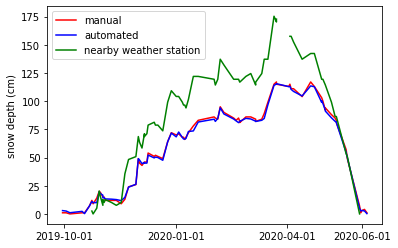

In [17]:
## three lines 
# pred
# actual 
# weather station

_merged_["date"] = pd.to_datetime(_merged_["dates"])

plt.plot(_merged_["date"],pd.to_numeric(_merged_['actual_sd']), color = 'red', label = 'manual') ##actual
plt.plot(_merged_["date"],pd.to_numeric(_merged_['snow_depth']), color = 'blue', label = 'automated') ## pred
plt.plot(_merged_["date"],pd.to_numeric(_merged_['SnowDepth (cm)']), color='green', label = 'nearby weather station') ## snotel
plt.xticks([pd.to_datetime('2019-10-01'),pd.to_datetime('2020-01-01'),pd.to_datetime('2020-04-01'),pd.to_datetime('2020-06-01')])
plt.legend()
plt.ylabel('snow depth (cm)')

In [18]:
print(np.mean(_merged_['SnowDepth (cm)'] - _merged_['snow_depth']))
print(np.std(_merged_['SnowDepth (cm)'] - _merged_['snow_depth']))


24.180536896612583
17.801983588973915


In [19]:
E9E['snow_depth']

0     2.939288
1     2.524491
2     1.042123
3     2.268388
4     0.278216
        ...   
81    4.939982
82    2.611947
83    3.111238
84    2.632367
85    0.257926
Name: snow_depth, Length: 86, dtype: float64

In [20]:
_merged_

,index,Unnamed: 0,Camera,filename,x1_pred,y1s_pred,x2_pred,y2_pred,x1_proj,y1_proj,...,times,Site Id,Date,Time,WTEQ.I-1 (in),PREC.I-1 (in),TOBS.I-1 (degC),SnowDepth.I-1 (in),SnowDepth (cm),date
0,175,175,E9E,E9E_WSCT0034.JPG,151.15775,56.092540,147.91396,200.03853,4102.853088,856.412899,...,11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-30
1,176,176,E9E,E9E_WSCT0045.JPG,150.56620,57.282210,147.26622,201.42229,4086.796657,874.576619,...,13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-03
2,177,177,E9E,E9E_WSCT0052.JPG,150.82410,57.956013,147.53770,202.80510,4093.796910,884.864123,...,11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-06
3,178,178,E9E,E9E_WSCT0084.JPG,151.44547,57.576214,147.88824,201.81929,4110.662624,879.065408,...,13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-16
4,179,179,E9E,E9E_WSCT0090.JPG,152.49161,57.733450,148.43297,202.88567,4139.057922,881.466095,...,13:00,682.0,2019/10/18,13:00,0.1,0.0,2.2,0.0,0.0,2019-10-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,256,256,E9E,E9E_WSCT0765.JPG,155.22234,55.568720,148.72841,198.20892,4213.177686,848.415306,...,13:00,682.0,2020/05/30,13:00,0.9,21.8,16.1,0.0,0.0,2020-05-30
82,257,257,E9E,E9E_WSCT0767.JPG,155.27850,55.660480,148.72945,199.40742,4214.702236,849.816265,...,12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-31
83,258,258,E9E,E9E_WSCT0769.JPG,155.15410,55.602787,148.07869,199.03168,4211.325531,848.935409,...,11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-01
84,259,259,E9E,E9E_WSCT0776.JPG,155.30017,55.911453,148.23686,199.57164,4215.290353,853.648081,...,12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-03
